In [131]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import re


def load_json_to_dataframe(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return pd.DataFrame(data['data'])

def jitter_labels(y, sigma=0.05):
    """Adding random noise to the data"""
    return np.clip(np.random.normal(y, sigma), 0, 1)

# Data from Homepage
data is from API

In [135]:
link_homepage = '../data/homepage_posts_data.json'
df_homepage = load_json_to_dataframe(link_homepage)

In [136]:
df_homepage.columns

Index(['id', 'created_at', 'title', 'slug', 'description', 'source', 'author',
       'published_at', 'votes', 'voted', 'comments', 'tags', 'hot', 'adult',
       'media', 'editable', 'deletable', 'resource', 'actions', 'archive',
       'observed_discussion', 'parent', 'tag_pinned_content', 'pinnable',
       'recommended', 'family_friendly', 'favourite', 'alerts', 'ama'],
      dtype='object')

In [137]:
df_homepage = df_homepage.drop(columns=[
    'created_at', 'source', 'slug', 'published_at', 'hot', 'adult', 'media', 'observed_discussion', 'parent', 'tag_pinned_content', 'pinnable', 'editable', 'deletable', 'resource', 'actions', 'archive', 'recommended', 'family_friendly', 'favourite', 'ama', 'voted'
])

In [138]:
df_homepage['author'] = df_homepage['author'].apply(lambda x: x['username'])
df_homepage['downvotes'] = df_homepage['votes'].apply(lambda x: x['down'])
df_homepage['votes'] = df_homepage['votes'].apply(lambda x: x['up'])

In [139]:
df_homepage

,id,title,description,author,votes,comments,tags,alerts,downvotes
0,7766021,Pracujących Polaków nie stać nawet na metr mie...,Polaków nie stać na zakup nawet 1 m kw. mieszk...,ross-flow,485,"{'hot': False, 'count': 222}","[nieruchomosci, wynajem, rynekwtorny, mieszkania]",[],13
1,7798801,"Owczarki zaatakowały jamnika. Brutus nie żyje,...",To był spacer jak każdego innego dnia. Nagle ł...,coiber,631,"{'hot': False, 'count': 101}","[lodz, psy, pies, psiarze, bekazpodludzi]",[],30
2,7667729,Mocne oświadczenie PZN po aferze w skokach. Li...,Tymczasowe zawieszenie sztabu szkoleniowego i ...,Bobito,288,"{'hot': False, 'count': 56}","[sport, skoki, skokinarciarskie, swiat]",[],4
3,7798789,Jak ojciec Sebastiana M. stracił milion złotyc...,"Właścicielem pojazdu był Jarosław M., ojciec S...",Kolekcjoner_dusz,707,"{'hot': False, 'count': 207}","[sebastianmajtczak, majtczak, polskiedrogi, wy...",[],4
4,7766029,zus anulował rente,"mieszkanka Szczecina, miała 27 lat, gdy straci...",stefan_1971,458,"{'hot': False, 'count': 123}","[zus, renta]",[],10
...,...,...,...,...,...,...,...,...,...
9858,7733231,xcancel.com - przeglądaj twitty I odpowiedzi b...,"W sumie trochę mnie dziwi, ze ta stronka nie j...",Returned,438,"{'hot': False, 'count': 32}","[technologia, twitter, lifehack, internet]",[],5
9859,7700465,Tani sposób Niemców na oczyszczanie wody. W Po...,"Nowe badanie pokazuje, że mikroplastiki i toks...",Rasteris,427,"{'hot': False, 'count': 53}","[woda, przyroda, nauka, technika, las]",[],9
9860,7798775,"Zabił rodzinę, uciekł ze szpitala. Dożywocia n...","Prokuratura żądała dożywocia, sąd się na to ni...",ZobaczLink,235,"{'hot': False, 'count': 28}","[polska, prawo, sadowehistorie, kryminalne, mo...",[],1
9861,7733241,Zabrali i umieścili w rodzinie zastępczej. Czt...,Policja odebrała i umieściła w rodzinie zastęp...,Kolekcjoner_dusz,543,"{'hot': False, 'count': 185}","[warszawa, policja, afera]",[],58


# Data from id scan

In [140]:
link = '../data/final_combined_results_7631933-7651933.json'
df_id = load_json_to_dataframe(link)

In [141]:
df_id.columns

Index(['id', 'url', 'title', 'points', 'description', 'added_date', 'tags',
       'alerts', 'comments', 'status', 'proxy', 'error'],
      dtype='object')

In [142]:
df_id = df_id[df_id['error'].isna()]

In [143]:
df_id = df_id.drop(columns=['status', 'proxy', 'error']).reset_index(drop=True)

In [144]:
alerts_df_id = df_id[df_id['alerts'].notna()]
alerts_df_id['zakopane'] = alerts_df_id['alerts'].apply(lambda x: x['title'] == 'To Znalezisko zostało zakopane')
alerts_df_id['duplikat'] = alerts_df_id['alerts'].apply(lambda x: (x['title'] == 'To Znalezisko zostało wyrzucone') and ('Duplikat' in x['body']))
print("Count of alerts: ", len(alerts_df_id))

# Check if all alerts are either 'zakopane' or 'duplikat'
zakopane_duplikat = (alerts_df_id['zakopane'] | alerts_df_id['duplikat']).all()

if zakopane_duplikat:
    print("All alerts are either 'zakopane' or 'duplikat'")
    
    # Remove the 'alerts' column as it is no longer needed
    alerts_df_id = alerts_df_id.drop(columns=['alerts'])

    # can remove duplicates now
    alerts_df_id = alerts_df_id[~alerts_df_id['duplikat']].drop(columns=['duplikat'])

Count of alerts:  1153
All alerts are either 'zakopane' or 'duplikat'


C:\Users\juziu\AppData\Local\Temp\ipykernel_6868\3722623095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alerts_df_id['zakopane'] = alerts_df_id['alerts'].apply(lambda x: x['title'] == 'To Znalezisko zostało zakopane')
C:\Users\juziu\AppData\Local\Temp\ipykernel_6868\3722623095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alerts_df_id['duplikat'] = alerts_df_id['alerts'].apply(lambda x: (x['title'] == 'To Znalezisko zostało wyrzucone') and ('Duplikat' in x['body']))


## Get comments and see if they contain information about manipulation and check their points

**NOTE**: this is still important to check because word 'manipulation' can also not address the original post

In [145]:
# content: None means that there was some multimedia posted and no text
df_id['comments_content_points'] = df_id['comments'].apply(lambda x: [(c['content'], c['points']) for c in x if c['content'] is not None])

In [146]:
import re
pattern = re.compile(r'\bmanipula\w*\b', flags=re.IGNORECASE)

df_id['mentions_manipulation'] = df_id['comments_content_points'] \
    .apply(lambda list_c:
        any(pattern.search(c[0]) for c in list_c if isinstance(c[0], str))
    )

In [147]:
df_id['top_manipulation_comment'] = df_id['comments_content_points'].apply(
    lambda comments: max(
        (c for c in comments if pattern.search(c[0])),
        key=lambda c: c[1],
        default=None
    )
)

## Is comment containing 'informacja nieprawdziwa' or 'nieprawdziwa informacja'

In [148]:
df_id['comment_informacja_nieprawdziwa'] = df_id['comments_content_points'].apply(
    lambda comments: max(
        (c for c in comments if re.compile(r'informacja nieprawdziwa|nieprawdziwa informacja', re.IGNORECASE).search(c[0])),
        key=lambda c: c[1],
        default=None
    )
)

In [149]:
df_id['comment_informacja_nieprawdziwa'].notna().sum()

np.int64(53)

In [150]:
comment_informacja_nieprawdziwa_points = df_id[df_id['comment_informacja_nieprawdziwa'].notna()]['comment_informacja_nieprawdziwa'].apply(lambda x: x[1])\
      / df_id[df_id['comment_informacja_nieprawdziwa'].notna()]['points'].abs()

df_id.loc[comment_informacja_nieprawdziwa_points.index, 'score_informacja_nieprawdziwa'] = comment_informacja_nieprawdziwa_points

### Method involves label smoothing - model will not generalize well possibly

In [151]:
df_id.loc[alerts_df_id.index, 'score_zakopane'] = np.clip(
    np.random.normal(loc=0.7, scale=0.05, size=len(alerts_df_id.index)),
    0, 1
)

In [154]:
df_id['scores'] = df_id[['score_informacja_nieprawdziwa', 'score_zakopane']].sum(axis=1, skipna=True).fillna(0)

In [155]:
df_id.loc[df_id[df_id['scores'] == 0].index, 'scores'] = np.clip(
    np.random.normal(loc=0, scale=0.05, size=len(df_id[df_id['scores'] == 0].index)),
    0, 1
)

In [156]:
df_id = df_id.rename(columns={'points': 'votes'})

# Data from Misinformation archive
https://wykoppl-informacjanieprawdziwa.surge.sh/

In [157]:
df_misinfo = load_json_to_dataframe('../data/mssinfo_wykop_posts.json')

In [158]:
df_misinfo['scores'] = np.clip(
    np.random.normal(loc=1, scale=0.05, size=len(df_misinfo.index)),
    0, 1
)

# Analysis

Data From ID scan: `df`  
Data from homepage: `df_homepage`  
Data from misinfo list: `df_misinfo`

In [159]:
df_homepage.columns

Index(['id', 'title', 'description', 'author', 'votes', 'comments', 'tags',
       'alerts', 'downvotes'],
      dtype='object')

For now, `df_homepage` is not yet to be joined because the comments are not fetched

In [160]:
df_id.columns

Index(['id', 'url', 'title', 'votes', 'description', 'added_date', 'tags',
       'alerts', 'comments', 'comments_content_points',
       'mentions_manipulation', 'top_manipulation_comment',
       'comment_informacja_nieprawdziwa', 'score_informacja_nieprawdziwa',
       'score_zakopane', 'scores'],
      dtype='object')

In [161]:
df_misinfo.columns

Index(['id', 'url', 'title', 'description', 'added_date', 'author', 'tags',
       'alerts', 'votes', 'downvotes', 'scores'],
      dtype='object')

In [162]:
df_id_ready = df_id.drop(columns=[
    'id', 'url', 'added_date', 'alerts', 'comments', 'comments_content_points', 
    'mentions_manipulation', 'top_manipulation_comment', 'comment_informacja_nieprawdziwa',
    'score_informacja_nieprawdziwa', 'score_zakopane'
    ]
)

In [163]:
df_id_ready.head()

,title,votes,description,tags,scores
0,Rządy PiS bez cenzury,2.0,Złoty interes,"[polityka, biznes, bekazpisu]",0.021230
1,Elon Musk robi Hitlera na wiecu prezydenckim,5.0,Nasi dziadkowie przewracają się w grobach.,"[elon, musk, wiec, hitler]",0.601637
2,K. Nawrocki przez pół roku mieszkał w apartame...,828.0,Karol Nawrocki jako dyrektor Muzeum II Wojny Ś...,"[polityka, wybory, sejm, pis]",0.000000
3,Elon Musk chce kupić Intela,12.0,"Nieoczekiwany zwrot u Intela. Okazuje się, że ...","[elonmusk, intel, technologia]",0.076696
4,Pierwsze decyzje Donalda Trumpa.,3.0,Pierwsze decyzje Donalda Trumpa.,"[ekonomia, usa, trump, wydarzeniaswiatedek, sw...",0.076554


In [164]:
df_misinfo_ready = df_misinfo.drop(columns=[
    'id', 'url', 'added_date', 'author', 'alerts', 'downvotes'
    ]
)

In [165]:
df_misinfo_ready.head()

,title,description,tags,votes,scores
0,We Francji spokojnie. W sylwestra spalono tylk...,"W noc sylwestrową we Francji spalono ""tylko"" 9...","[europa, swiat, imigranci, ciekawostki, francja]",2305,1.000000
1,[Afera Prezydencka] Moderator fDy,A gdyby tak większa ilość użytkowników #wykop ...,"[wykop, afera, aferaprezydecka, lechwalesacont...",428,1.000000
2,Szczera wypowiedź Tomasza Lisa,pan redaktor w końcu powiedział co tak naprawd...,"[polityka, heheszki, lisnadzis, kod, media]",1357,0.963792
3,Inwazja zombie-islamu na Europę stała się fakt...,Zobaczcie jak przybysze bawią się z Niemką w c...,"[europa, islam, imigranci, kolonia, uchodzcy, ...",145,0.998622
4,Czy tak wyglądały ataki w Koloni w Nowy Rok?,Podejrzewam że to dopiero początek wrzut tego ...,"[europa, imigranci, islam]",33,0.976296


In [166]:
df = pd.concat([df_misinfo_ready, df_id_ready], ignore_index=True)

In [167]:
df['scores'] = df['scores'].apply(lambda x: min(1, max(0, x)))

<Axes: ylabel='Frequency'>

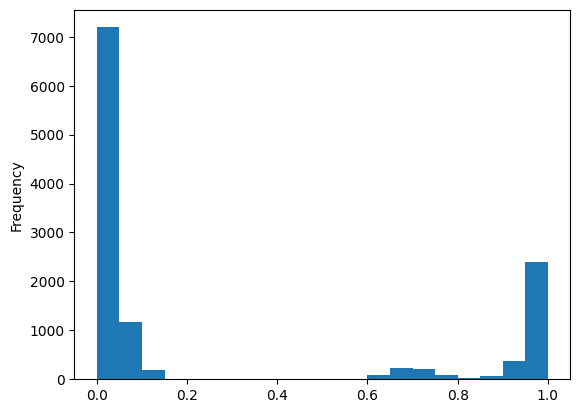

In [168]:
df['scores'].sort_values().plot(kind='hist', bins=20)

# Preparing the data

In [169]:
df["text"] = (
    df["title"].fillna('') + " " +
    df["description"].fillna('') + " " +
    df["tags"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)
)

In [170]:
def clean_text(t):
    def _normalize_polish_characters(text):
        mapping = {
            "ą": "a", "ć": "c", "ę": "e", "ł": "l",
            "ń": "n", "ó": "o", "ś": "s", "ź": "z", "ż": "z",
            "Ą": "A", "Ć": "C", "Ę": "E", "Ł": "L",
            "Ń": "N", "Ó": "O", "Ś": "S", "Ź": "Z", "Ż": "Z"
        }
        for k, v in mapping.items():
            text = text.replace(k, v)
        return text
    t = t.lower()
    t = _normalize_polish_characters(t)
    t = re.sub(r"http\S+", "", t)
    t = re.sub(r"[^a-z0-9\s]", "", t)
    return t.strip()

df["clean_text"] = df["text"].apply(clean_text)

In [171]:
df['clean_text'].head()

0    we francji spokojnie w sylwestra spalono tylko...
1    afera prezydencka moderator fdy a gdyby tak wi...
2    szczera wypowiedz tomasza lisa pan redaktor w ...
3    inwazja zombieislamu na europe stala sie fakte...
4    czy tak wygladaly ataki w koloni  w nowy rok p...
Name: clean_text, dtype: object

## Initial model

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["scores"], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1,2),
    min_df=2
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = Ridge(alpha=1.0)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 0.22739153993784067
R²: 0.4918459980097155


In [173]:
for pr, ts, x_ts, _ in zip(y_pred, y_test, X_test, range(10)):
    print(pr, ts, x_ts)

0.5960931962081002 0.9048521083463157 uk obniza vat z 20 do 5 na wszystkie produkty w sklepach  taka pomoc dla obywateli na 6mcy europa uk vat ekonomia polityka
0.06916718189200166 0.000575485478019013 rok jedzenia chicken sandwich w popeyes za darmo kolejnym otwarciom nowych lokali popeyes w polsce towarzyszy promocja w ktorej na klientow czeka az rok darmowego jedze popeyes promocja darmo kurczak
0.4549876278551961 0.8998512955532599 to tylko jakis patent   patent z 2015 roku teoriespiskowe patent covid19
0.08062178305573178 0.09856412697571337 microsoft account od lutego duza zmiana w logowaniu sie do konta od lutego jesli zalogujesz sie uzytkownicy beda automatycznie zalogowani caly czas istnieje nowa globalna opcja wylogowania wyloguj sie wszedzie moze to potrwac do 24 godzin zanim microsoft wyloguje uzytkownika ze wszystkich urzadzen chyba ich troche ponioslo microsoft windows cyberbezpieczenstwo security cybersecurity komputery
0.31795131849326835 0.055607284271827234 rzad w uk 

## Change problem to classification

In [174]:
df["scores"]

0        1.000000
1        1.000000
2        0.963792
3        0.998622
4        0.976296
           ...   
12062    0.034823
12063    0.000000
12064    0.055135
12065    0.000000
12066    0.030178
Name: scores, Length: 12067, dtype: float64

In [203]:
df["label"] = df["scores"].apply(lambda x: 0 if x < 0.35 else (2 if x > 0.85 else 1))

df["label"].value_counts(normalize=True)

label
0    0.714679
2    0.230025
1    0.055296
Name: proportion, dtype: float64

In [204]:
df = df[~df['clean_text'].duplicated()].reset_index(drop=True)

              precision    recall  f1-score   support

           0      0.892     0.847     0.869      1714
           1      0.196     0.308     0.240       133
           2      0.790     0.808     0.799       551

    accuracy                          0.808      2398
   macro avg      0.626     0.654     0.636      2398
weighted avg      0.830     0.808     0.818      2398



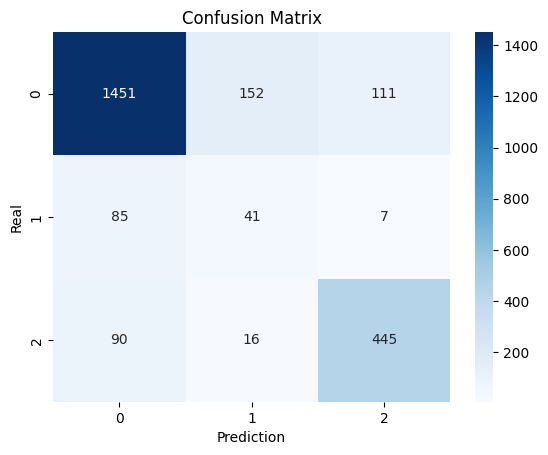

In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(
    df["clean_text"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)


model = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=10000, ngram_range=(1,2), min_df=2)),
    ("clf", LogisticRegression(max_iter=1000, class_weight='balanced'))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title("Confusion Matrix")
plt.show()

### Class balancing

              precision    recall  f1-score   support

           0      0.962     0.939     0.950      1714
           1      0.528     0.670     0.590       100
           2      0.561     0.640     0.598       100

    accuracy                          0.909      1914
   macro avg      0.684     0.750     0.713      1914
weighted avg      0.918     0.909     0.913      1914



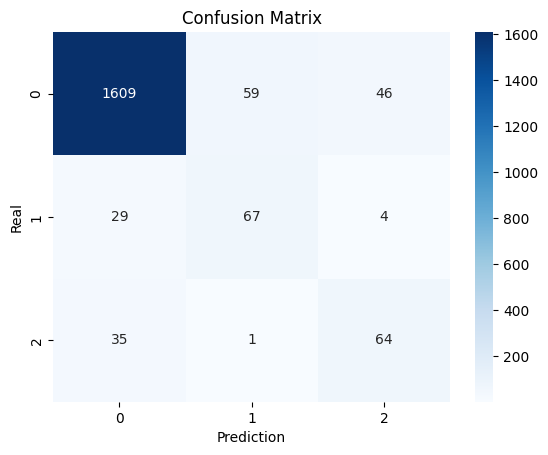

In [177]:
from sklearn.utils import resample

majority = df[df.label == 0]
minority1 = df[df.label == 1]
minority2 = df[df.label == 2]

minority1_upsampled = resample(minority1, replace=True, n_samples=500, random_state=42)
minority2_upsampled = resample(minority2, replace=True, n_samples=500, random_state=42)

df_balanced = pd.concat([majority, minority1_upsampled, minority2_upsampled])

# Retraining
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced["clean_text"], df_balanced["label"], test_size=0.2, random_state=42, stratify=df_balanced["label"]
)


model = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=10000, ngram_range=(1,3), min_df=2, sublinear_tf=True)), # bigrams and trigrams
    ("clf", LogisticRegression(max_iter=1000, class_weight='balanced'))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title("Confusion Matrix")
plt.show()

### Try only 2 labels classification

In [207]:
df["label"] = df["scores"].apply(lambda x: 0 if x < 0.5 else 1)

df["label"].value_counts(normalize=True)

label
0    0.714929
1    0.285071
Name: proportion, dtype: float64

              precision    recall  f1-score   support

           0      0.899     0.900     0.900      1714
           1      0.749     0.747     0.748       684

    accuracy                          0.857      2398
   macro avg      0.824     0.824     0.824      2398
weighted avg      0.856     0.857     0.856      2398



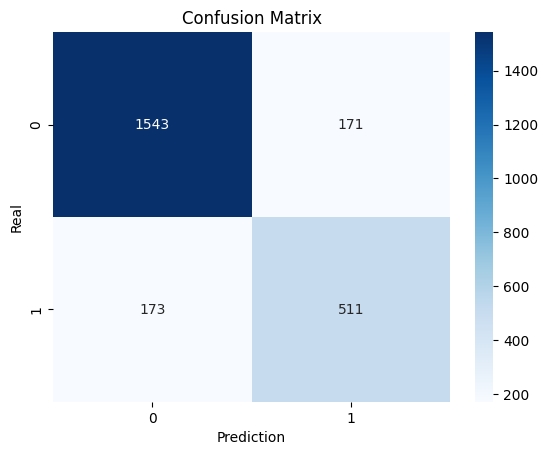

In [208]:
X_train, X_test, y_train, y_test = train_test_split(
    df["clean_text"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)


model = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=10000, ngram_range=(1,2), min_df=2)),
    ("clf", LogisticRegression(max_iter=1000, class_weight='balanced'))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title("Confusion Matrix")
plt.show()

### With balancing

              precision    recall  f1-score   support

           0      0.873     0.907     0.890      1715
           1      0.903     0.868     0.885      1714

    accuracy                          0.888      3429
   macro avg      0.888     0.888     0.888      3429
weighted avg      0.888     0.888     0.888      3429



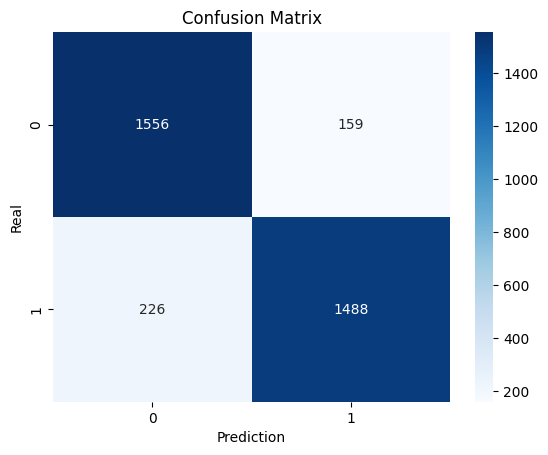

In [209]:
from sklearn.utils import resample

majority = df[df.label == 0]
minority = df[df.label == 1]

minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)

df_balanced = pd.concat([majority, minority_upsampled])

# Retraining
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced["clean_text"], df_balanced["label"], test_size=0.2, random_state=42, stratify=df_balanced["label"]
)


model = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=10000, ngram_range=(1,3), min_df=2, sublinear_tf=True)), # bigrams and trigrams
    ("clf", LogisticRegression(max_iter=1000, class_weight='balanced'))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title("Confusion Matrix")
plt.show()

In [222]:
vectorizer = model.named_steps['tfidf']
clf = model.named_steps['clf']

feature_names = np.array(vectorizer.get_feature_names_out())
coefs = clf.coef_[0]

topn_pos = np.argsort(coefs)[-15:]   # top cechy dla klasy 1
topn_neg = np.argsort(coefs)[:15]    # top cechy dla klasy 0

print("-> Top 15 słów wskazujących na klasę 1 (manipulacja):")
for idx in topn_pos[::-1]:
    print(f"{feature_names[idx]} ({coefs[idx]:.3f})")

print("\n-> Top 15 słów wskazujących na klasę 0 (prawdziwe informacje):")
for idx in topn_neg:
    print(f"{feature_names[idx]} ({coefs[idx]:.3f})")

-> Top 15 słów wskazujących na klasę 1 (manipulacja):
swiat (8.444)
koronawirus (7.766)
wykop (6.553)
covid19 (5.648)
4konserwy (5.147)
europa (5.144)
moderacja (4.929)
szczepienia (4.044)
bekazlewactwa (3.641)
moderacjacontent (3.551)
polska (3.404)
lgbt (3.364)
afera (3.288)
zydzi (3.080)
neuropa (2.994)

-> Top 15 słów wskazujących na klasę 0 (prawdziwe informacje):
gospodarka (-3.323)
nieruchomosci (-3.254)
wydarzenia (-3.004)
gry (-2.870)
2024 (-2.838)
polityka (-2.605)
historia (-2.600)
trump (-2.524)
wypadek (-2.306)
na (-2.241)
inwestycje (-2.240)
kryminalne (-2.238)
gruparatowaniapoziomu (-2.177)
demografia (-2.165)
ciekawostki (-2.145)
